In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd
import Drangle
import plotly.express as px

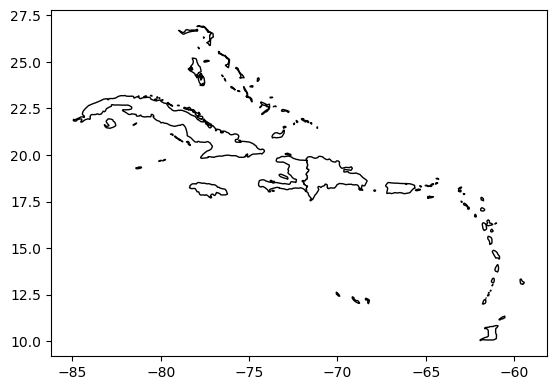

In [2]:
carib= gpd.read_file('caribbean.json')
carib= carib.drop(columns= ["created_at","updated_at","cartodb_id"]).rename(columns={"name":"Country"})
carib.plot(color= "white", edgecolor= "black");

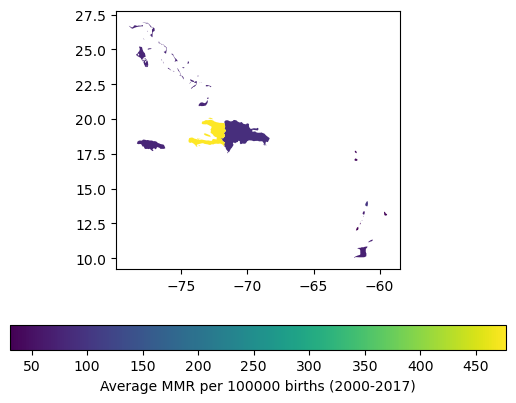

In [3]:
from Drangle import countrytrends
maps= countrytrends.groupby(["Country", "IncomeGroup"]).agg( 
    AvgMMR = ("Avg_MMR","mean")).reset_index()
economic= carib.merge(maps, how = "left", left_on="Country", right_on="Country").dropna().drop(columns="IncomeGroup")
economic.plot(column = 'AvgMMR', legend = True, 
                   legend_kwds={'label': "Average MMR per 100000 births (2000-2017)", 
                                'orientation': "horizontal"});

In [7]:
Women_Gdp = px.scatter(data_frame = countrytrends,  x="GdpCap", y= "Avg_MMR", size="FemPop", animation_frame="Year", animation_group="Country", color="Country",
           hover_name="Country", range_y=[0,1000])
Women_Gdp.show()